## Working with hand radiograph. 

Hand radiograph are obtained from [2017 Radiological Society of North America competition](http://rsnachallenges.cloudapp.net/competitions/4). 

X-ray intensities are high in dense tissue such as bone. Such images can be used to predict "bone age " in children.

### Loading images

In [2]:
import imageio
import numpy as np
import matplotlib.pyplot as plt
import scipy.ndimage as ndi  # 

im = imageio.imread('Data/hand.png')

print('Data type:', im.dtype)
print('Min. value:', im.min())
print('Max value:', im.max())

Data type: uint8
Min. value: 3
Max value: 224


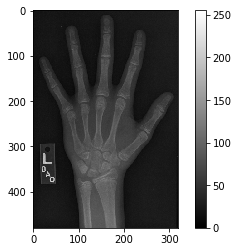

In [6]:
# normalize luminance data using vmin and vmax. 

plt.imshow(im, vmin=0, vmax=255, cmap='gray')
plt.colorbar()